In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

Using TensorFlow backend.


In [ ]:
path = "/content/Train"
files = os.listdir(path)
size = len(files)
print("Total directories:",size)


Total directories: 43


In [ ]:
Images = []
import os
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        img = os.path.join(dirname, filename)
        Images.append(img)

In [ ]:
len(Images)

39209

In [ ]:
Images[10]

'/content/Train/3/00003_00006_00026.png'

In [ ]:
Class_label = []
for i in Images:
  j = i.split("/")
  
#   print(j)
  Class_label.append(j[-2])

In [ ]:
Class_label[:10]

['3', '3', '3', '3', '3', '3', '3', '3', '3', '3']

In [ ]:
len(Class_label)

39209

In [ ]:
import random
temp = list(zip(Images, Class_label)) 
random.shuffle(temp) 
Images, Class_label = zip(*temp)

In [ ]:
data = pd.DataFrame(list(zip(Images, Class_label)), columns =['Image_path', 'Class_label'])   

In [ ]:
data

,Image_path,Class_label
0,/content/Train/33/00033_00017_00015.png,33
1,/content/Train/13/00013_00001_00007.png,13
2,/content/Train/18/00018_00033_00018.png,18
3,/content/Train/14/00014_00001_00004.png,14
4,/content/Train/16/00016_00006_00020.png,16
...,...,...
39204,/content/Train/26/00026_00004_00027.png,26
39205,/content/Train/10/00010_00057_00020.png,10
39206,/content/Train/17/00017_00034_00011.png,17
39207,/content/Train/9/00009_00001_00000.png,9


In [ ]:
data.shape 

(39209, 2)

In [ ]:
data.Class_label.value_counts() 

2     2250
1     2220
13    2160
12    2100
38    2070
10    2010
4     1980
5     1860
25    1500
9     1470
7     1440
3     1410
8     1410
11    1320
35    1200
18    1200
17    1110
31     780
14     780
33     689
15     630
26     600
28     540
23     510
30     450
16     420
6      420
34     420
36     390
22     390
20     360
40     360
21     330
39     300
24     270
29     270
42     240
32     240
41     240
27     240
0      210
19     210
37     210
Name: Class_label, dtype: int64

Text(0.5, 0, 'Class_label')

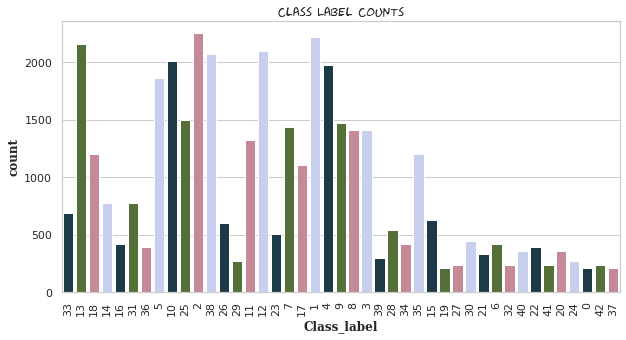

In [ ]:
#counts of top 10 drugs
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="Class_label", data=data, palette=sns.color_palette("cubehelix", 4))
plt.xticks(rotation=90)
plt.title("Class Label Counts", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("count", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Class_label", {"fontname": "serif", "fontweight":"bold"}) 

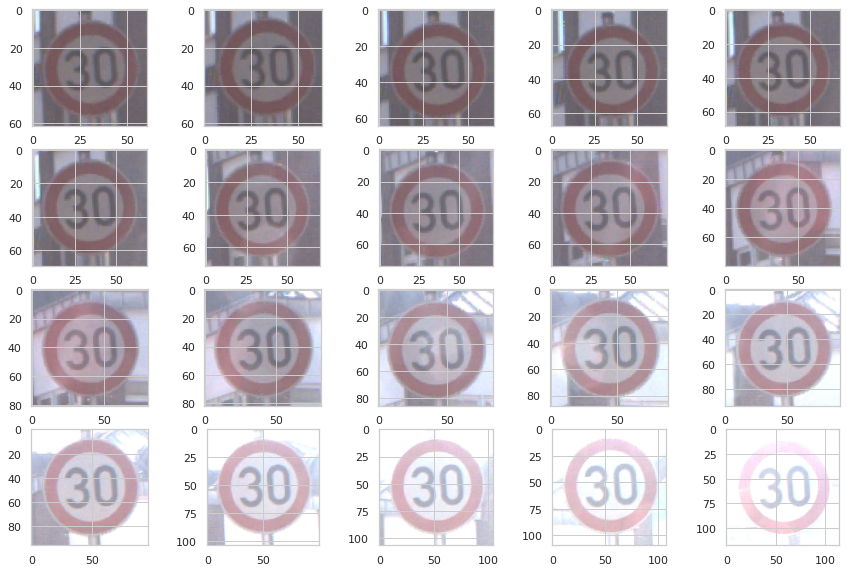

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
# define location of dataset
folder = '/content/'
sub1_folder = 'Train/'
sub2_folder = '1/'

train_with_1 = os.path.join(folder + sub1_folder + sub2_folder)

plt.figure(figsize=(15,15))
# plot first few images
for i in range(10,30):
    # define subplot
    plt.subplot(6,5,i+1)   # i+1 because initially i = 0 , so subplot gives an error at i=0 (so change that i=1) 
    # define filename
    filename = train_with_1 + '00001_00000_000'+ str(i) + '.png'
     # load image pixels
    image = imread(filename)
    # plot raw pixel data
    plt.imshow(image)
# show the figure
plt.show()

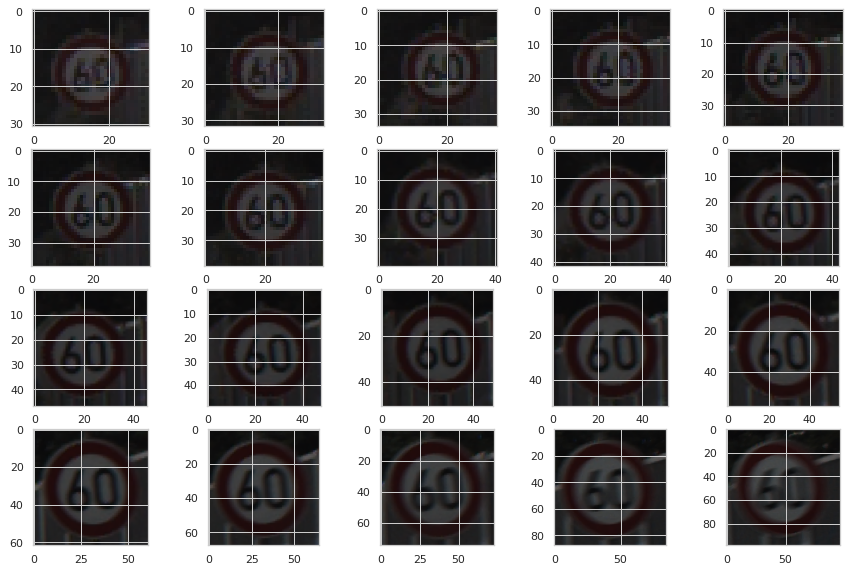

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
# define location of dataset
folder = '/content/'
sub1_folder = 'Train/'
sub2_folder = '3/'

train_with_3 = os.path.join(folder + sub1_folder + sub2_folder)

plt.figure(figsize=(15,15))
# plot first few images
for i in range(10,30):
    # define subplot
    plt.subplot(6,5,i+1)   # i+1 because initially i = 0 , so subplot gives an error at i=0 (so change that i=1) 
    # define filename
    filename = train_with_3 + '00003_00000_000'+ str(i) + '.png'
     # load image pixels
    image = imread(filename)
    # plot raw pixel data
    plt.imshow(image)
# show the figure
plt.show()

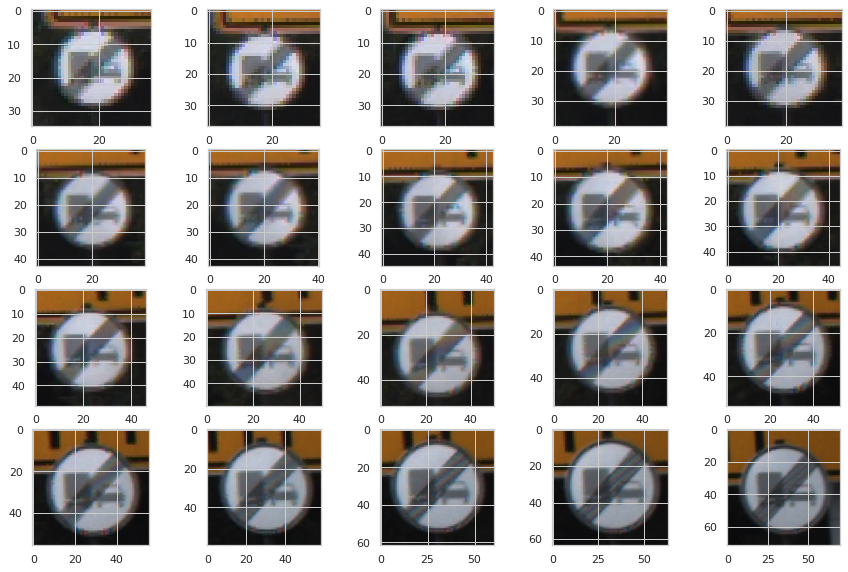

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
# define location of dataset
folder = '/content/'
sub1_folder = 'Train/'
sub2_folder = '42/'

train_with_42 = os.path.join(folder + sub1_folder + sub2_folder)

plt.figure(figsize=(15,15))
# plot first few images
for i in range(10,30):
    # define subplot
    plt.subplot(6,5,i+1)   # i+1 because initially i = 0 , so subplot gives an error at i=0 (so change that i=1) 
    # define filename
    filename = train_with_42 + '00042_00000_000'+ str(i) + '.png'
     # load image pixels
    image = imread(filename)
    # plot raw pixel data
    plt.imshow(image)
# show the figure
plt.show()

In [ ]:
train_image = len(os.listdir('/content/Train'))
print("Train Dataset: {}".format(train_image))

Train Dataset: 43


In [ ]:
for i in range(43):
    train_image = len(os.listdir('/content/Train/'+str(i)))
    print(f"Train Dataset{i}: {train_image}")

Train Dataset0: 210
Train Dataset1: 2220
Train Dataset2: 2250
Train Dataset3: 1410
Train Dataset4: 1980
Train Dataset5: 1860
Train Dataset6: 420
Train Dataset7: 1440
Train Dataset8: 1410
Train Dataset9: 1470
Train Dataset10: 2010
Train Dataset11: 1320
Train Dataset12: 2100
Train Dataset13: 2160
Train Dataset14: 780
Train Dataset15: 630
Train Dataset16: 420
Train Dataset17: 1110
Train Dataset18: 1200
Train Dataset19: 210
Train Dataset20: 360
Train Dataset21: 330
Train Dataset22: 390
Train Dataset23: 510
Train Dataset24: 270
Train Dataset25: 1500
Train Dataset26: 600
Train Dataset27: 240
Train Dataset28: 540
Train Dataset29: 270
Train Dataset30: 450
Train Dataset31: 780
Train Dataset32: 240
Train Dataset33: 689
Train Dataset34: 420
Train Dataset35: 1200
Train Dataset36: 390
Train Dataset37: 210
Train Dataset38: 2070
Train Dataset39: 300
Train Dataset40: 360
Train Dataset41: 240
Train Dataset42: 240


In [ ]:
data = []
labels = []
classes = 43
cur_path = '/content/Train/'


In [ ]:
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((48,48))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [ ]:
len(data)

39209

In [ ]:
len(labels)

39209

In [ ]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [ ]:
data.shape

(39209, 48, 48, 3)

In [ ]:
labels.shape

(39209,)

In [ ]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 48, 48, 3) (7842, 48, 48, 3) (31367,) (7842,)


In [ ]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
print( y_train.shape, y_test.shape)


(31367, 43) (7842, 43)
